In [1]:
import numpy as np                 # for handling large arrays
import pandas as pd                # for data manipulation and analysis
import sklearn                     # a machine learning library
import os                          # for accessing local files
import IPython.display as ipd
import librosa.display             # librosa plot functions
import matplotlib.pyplot as plt    # plotting with Matlab functionality
import librosa

In [2]:
df = pd.DataFrame(columns = ['audio_file', 'spectrogram', 'mel_spectrogram', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'chroma1', 'chroma2', 'chroma3', 'chroma4', 'chroma5', 'chroma6', 'chroma7', 'chroma8', 'chroma9', 'chroma10', 'chroma11', 'chroma12', 'chroma_std'])
df

Empty DataFrame
Columns: [audio_file, spectrogram, mel_spectrogram, mfcc1, mfcc2, mfcc3, mfcc4, mfcc5, mfcc6, mfcc7, mfcc8, mfcc9, mfcc10, mfcc11, mfcc12, mfcc13, chroma1, chroma2, chroma3, chroma4, chroma5, chroma6, chroma7, chroma8, chroma9, chroma10, chroma11, chroma12, chroma_std]
Index: []

[0 rows x 29 columns]

In [1]:
BASE_FOLDER = "/Users/Praveena Acharya/Desktop/Audio Spectral Analysis/Audio Data"
sound_file = "Sargam2.wav"

In [4]:
ipd.Audio(os.path.join(BASE_FOLDER, sound_file))

In [5]:
y, sr = librosa.load(os.path.join(BASE_FOLDER, sound_file))

In [6]:
voice, _ = librosa.effects.trim(y)

In [7]:
frame_length = 1024
hop_length = 512
number_of_mfcc = 13
features = [sound_file]

In [8]:
# Short-time Fourier transform (STFT)
d_audio = np.abs(librosa.stft(voice, n_fft=frame_length, hop_length=hop_length))

## 1. Spectrogram

In [9]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
db_audio = librosa.amplitude_to_db(d_audio, ref=np.max)

In [10]:
spectrogram = np.mean(db_audio[0])
print(spectrogram)

-35.429535


In [11]:
features.append(spectrogram)

### Visualizing spectrogram

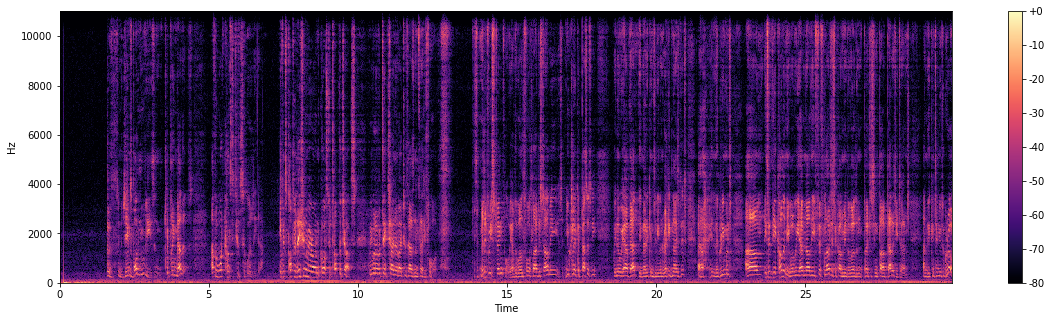

In [12]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(db_audio, sr=sr, hop_length=hop_length, x_axis="time", y_axis="linear")
plt.colorbar(format="%+2.f")

## 2. Mel Spectrogram

In [13]:
s_audio = librosa.feature.melspectrogram(voice, sr=sr)
s_db_audio = librosa.amplitude_to_db(s_audio, ref=np.max)

In [14]:
mel_spectrogram = np.mean(s_db_audio[0])
print(mel_spectrogram)

-54.104755


In [15]:
features.append(mel_spectrogram)

### Visualizing Mel Spectrogram

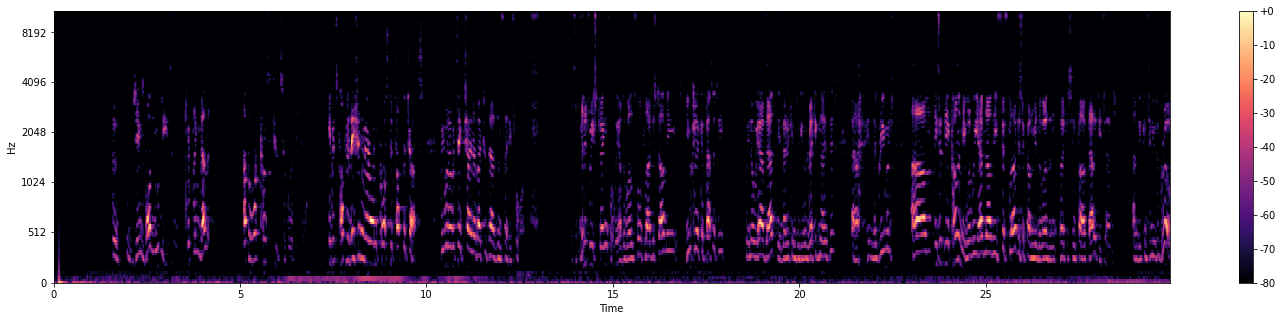

In [16]:
plt.figure(figsize=(25, 5))
librosa.display.specshow(s_db_audio, x_axis="time",y_axis="mel", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## 3. MFCC - Mel Fequency Cepstral Coefficients


In [17]:
mfccs = librosa.feature.mfcc(voice, sr=sr, n_mfcc=number_of_mfcc)

In [18]:
mfccs.shape

(13, 1289)

In [19]:
delta = librosa.feature.delta(mfccs)

In [20]:
accelerate = librosa.feature.delta(mfccs, order=2)

In [21]:
mfcc_features = []

In [22]:
for i in range(0, number_of_mfcc):
    mfcc_value = np.mean(mfccs[i])
    mfcc_features.append(mfcc_value)

#         # mfcc delta coefficient
#         key_name = "".join(['mfcc_delta_', str(i)])
#         mfcc_value = np.mean(delta[i])
#         mfcc_features.update({key_name: mfcc_value})

#         # mfcc accelerate coefficient
#         key_name = "".join(['mfcc_accelerate_', str(i)])
#         mfcc_value = np.mean(accelerate[i])
#         mfcc_features.update({key_name: mfcc_value})

In [23]:
mfcc_features

[-405.14633,
 76.709045,
 -14.9667015,
 17.29216,
 22.315758,
 -17.384418,
 -4.5914054,
 -0.34202507,
 1.1304802,
 -1.1247674,
 11.165361,
 9.834832,
 7.5890064]

### Visualizing MFCC

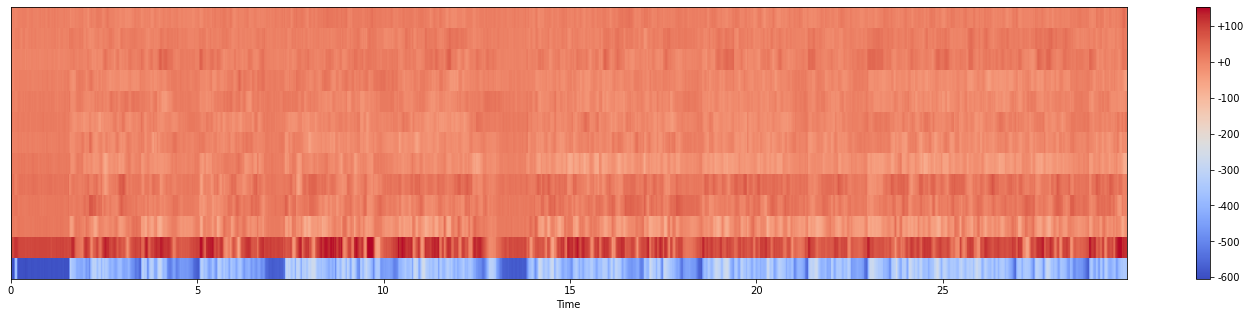

In [24]:
plt.figure(figsize=(25, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format="%+2.f")
plt.show()

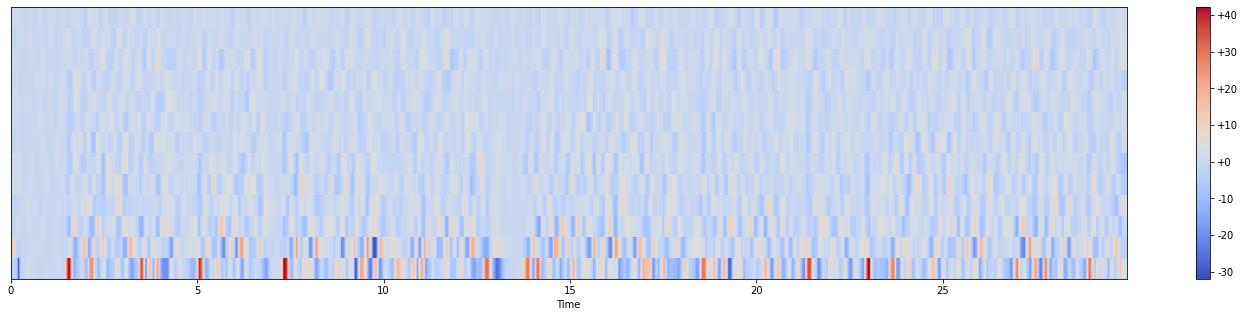

In [25]:
plt.figure(figsize=(25, 5))
librosa.display.specshow(delta, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

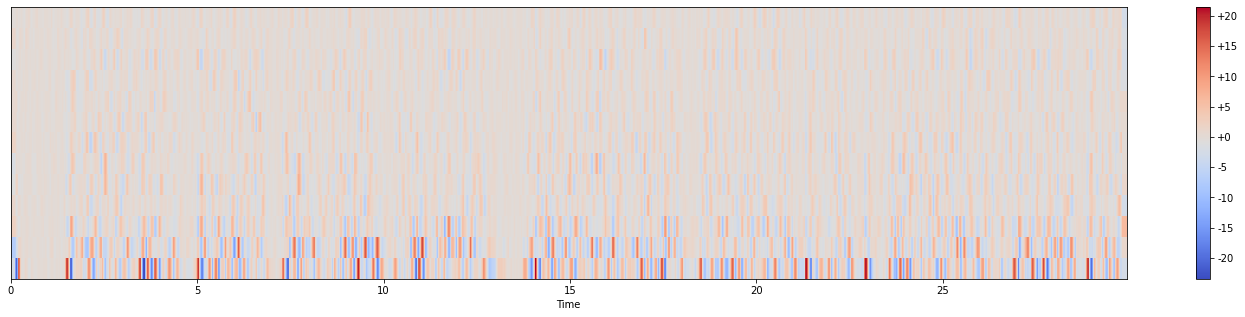

In [26]:
plt.figure(figsize=(25, 5))
librosa.display.specshow(accelerate, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## 4. Chroma Features

In [27]:
chromagram = librosa.feature.chroma_stft(voice, sr=sr, hop_length=hop_length)

In [28]:
chromagram.shape

(12, 1289)

In [29]:
chroma_features = []

In [30]:
for i in range(0, 12):
        chroma_value = np.mean(chromagram[i])
        chroma_features.append(chroma_value)

In [31]:
chroma_features

[0.55440897,
 0.54997146,
 0.52894884,
 0.5182372,
 0.4654717,
 0.3331362,
 0.31363657,
 0.32287452,
 0.3137818,
 0.34831116,
 0.34664473,
 0.42344758]

In [32]:
chroma_std_arr = np.array([chroma_features]) 
chroma_std = np.std(chroma_std_arr)
print(chroma_std)
chroma_features.append(chroma_std)

0.0951383


### Visualizing chroma features

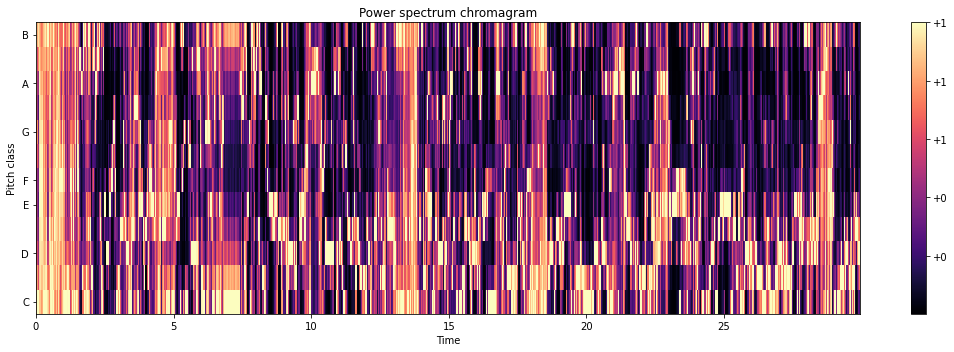

In [33]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length)
plt.colorbar(format="%+2.f")
plt.title('Power spectrum chromagram')
plt.tight_layout()
plt.show()

## Creating DataFrame

In [34]:
features = features + mfcc_features + chroma_features

In [35]:
features
print(len(features))

29


In [36]:
df.loc[len(df)] = features

In [37]:
df

audio_file  spectrogram  mel_spectrogram       mfcc1      mfcc2  \
0  Shashi_Tharoor.wav   -35.429535       -54.104755 -405.146332  76.709045   

       mfcc3     mfcc4      mfcc5      mfcc6     mfcc7  ...   chroma4  \
0 -14.966702  17.29216  22.315758 -17.384418 -4.591405  ...  0.518237   

    chroma5   chroma6   chroma7   chroma8   chroma9  chroma10  chroma11  \
0  0.465472  0.333136  0.313637  0.322875  0.313782  0.348311  0.346645   

   chroma12  chroma_std  
0  0.423448    0.095138  

[1 rows x 29 columns]

In [39]:
df.to_csv('time-freq-database.csv', mode='a', index=False, header=False)